# MATK Data Preprocessing

A meme consists of multiple elements that can be extract to improve comprehension:

1. Text Overlay 
2. Image Caption
3. Web Entities (Preprocessing Not Supported)
4. Image Features
5. Meme Cleaning (Inpainting)

To help with this, MATK provides the following preprocessing procedures.

## Getting Started

For this tutorial, we will be using the Harm-P dataset from https://github.com/LCS2-IIITD/MOMENTA

In [1]:
!pip install -r ../requirements.txt

  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-5q7s64mg
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-5q7s64mg
  Resolved https://github.com/openai/CLIP.git to commit a1d071733d7111c9c014f024669f959182114e33
  Preparing metadata (setup.py) ... done
  Using cached Pillow-8.2.0-cp38-cp38-manylinux1_x86_64.whl.metadata (7.1 kB)
ERROR: Could not find a version that satisfies the requirement easyocr-1.7.1 (from versions: none)
ERROR: No matching distribution found for easyocr-1.7.1


## Text Overlay
The techniques to extract the text overlay are defined under `preprocessing/ocr-extraction`.

MATK features wrappers for the following state-of-the-art models:

1. **EasyOCR**: `easyocr.py`

In [2]:
!python ../preprocessing/text-extraction/easyocr-wrapper.py \
  --img_dir "/mnt/data1/datasets/memes/harmp/images/harmeme_images_us_pol" \
  --output_dir "/mnt/data1/datasets/memes/harmp/preprocessing/text-extraction/easyocr/harmeme_images_us_pol"

/home/mshee/anaconda3/envs/MATK-test/lib/python3.8/site-packages/transformers/utils/hub.py:124: FutureWarning: Using `PYTORCH_TRANSFORMERS_CACHE` is deprecated and will be removed in v5 of Transformers. Use `HF_HOME` instead.
  warnings.warn(
3552
Find 3552 images!
  0%|                                          | 1/3552 [00:00<31:23,  1.89it/s]/home/mshee/anaconda3/envs/MATK-test/lib/python3.8/site-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
  0%|▏                                        | 17/3552 [00:02<07:15,  8.12it/s]
Traceback (most recent call last):
  File "../preprocessing/text-extraction/easyocr-wrapper.py", line 58, in <module>
    detect(args.img_dir, args.output_dir)
  File "../preprocessing/text-e

Viola! The text overlay on top of the meme should be extracted and stored inside the output directory.

Let's examine one of the example and see the accuracy of the optical character recognition technique.

In [3]:
import os
import json

# Loading OCR Text
meme_id = "memes_965"
ocr_dir = "/mnt/data1/datasets/memes/harmp/preprocessing/text-extraction/easyocr/harmeme_images_us_pol"
ocr_filepath = os.path.join(ocr_dir, f"{meme_id}.json")

with open(ocr_filepath) as f:
    ocr_data = json.load(f)

In [4]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

# Loading Image
img_dir = "/mnt/data1/datasets/memes/harmp/images/harmeme_images_us_pol"
image_path = os.path.join(img_dir, f"{meme_id}.png")
image = Image.open(image_path)

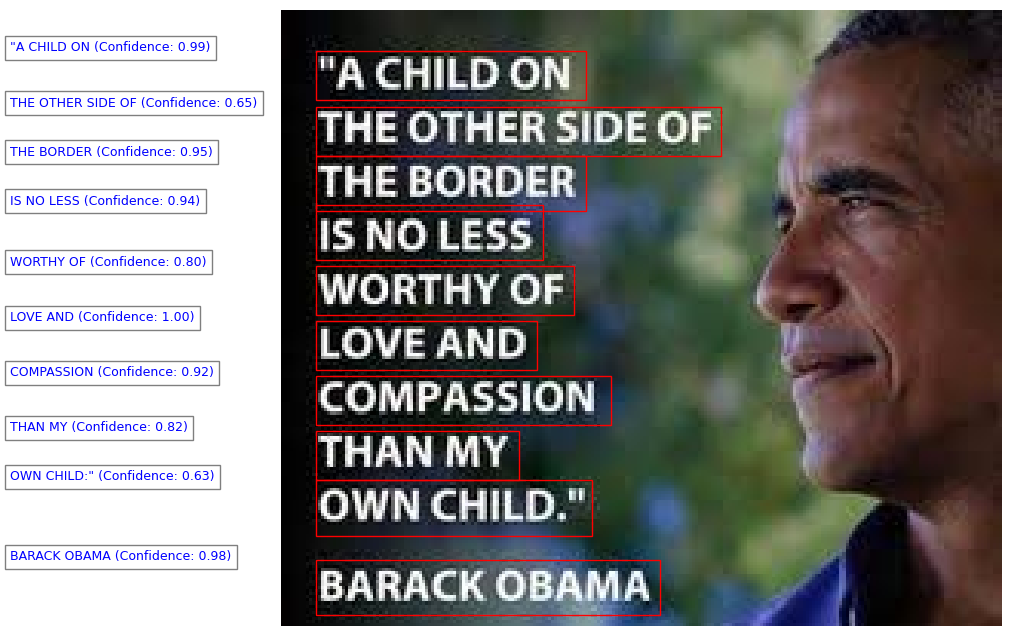

In [5]:
# Create figure and axes
fig, ax = plt.subplots(1, figsize=(12, 8))
ax.imshow(image)

# Draw rectangles and text
for box, text, confidence in ocr_data:
    # Calculate rectangle parameters
    x_min, y_min = box[0][0], box[0][1]
    width = box[1][0] - box[0][0]
    height = box[2][1] - box[1][1]
    
    # Create a rectangle patch
    rect = patches.Rectangle((x_min, y_min), width, height, linewidth=1, edgecolor='r', facecolor='none')
    
    # Add the rectangle to the Axes
    ax.add_patch(rect)
    
    # Add text annotation
    ax.text(x_min - 100, y_min, f"{text} (Confidence: {confidence:.2f})", fontsize=9, color='blue', bbox=dict(facecolor='white', alpha=0.5))


# Display the figure
plt.axis('off')  # Turn off axis
plt.show()

## Image In-Painting
The techniques to clean the meme image are defined under `preprocessing/image-inpainting`.

MATK features wrappers for the following state-of-the-art models:

1. **MMEDIT (Based on HimariO's implementation)**: `inpainting-wrapper.py` (CAUTIOUS - Read README.MD carefully)

In [19]:
!python ../preprocessing/image-inpainting/cv2/inpainting-wrapper.py \
  --img_dir "/mnt/data1/datasets/memes/harmp/images/harmeme_images_us_pol" \
  --ocr_dir "/mnt/data1/datasets/memes/harmp/preprocessing/text-extraction/easyocr/harmeme_images_us_pol" \
  --cleaned_dir "/mnt/data1/datasets/memes/harmp/images/img_clean/harmeme_images_us_pol" \
  --mask_dir "/mnt/data1/datasets/memes/harmp/images/img_mask/harmeme_images_us_pol"

libpng warning: iCCP: extra compressed data


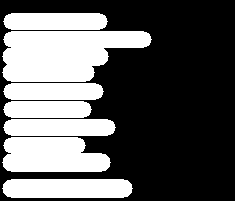

In [21]:
from PIL import Image
Image.open(f"/mnt/data1/datasets/memes/harmp/images/img_mask/harmeme_images_us_pol/{meme_id}.mask.png")

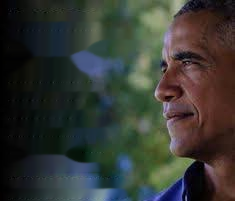

In [22]:
from PIL import Image
Image.open(f"/mnt/data1/datasets/memes/harmp/images/img_clean/harmeme_images_us_pol/{meme_id}.png").convert('RGB')

## Image Captioning

Image captioning procedures are defined under `preprocessing/image-captioning`. 
MATK features wrappers for performing image captioning with several state-of-the-art models:

1. **BLIP-2**: `blip2captioning.py`
2. **InstructBLIP**: `InstructBLIP-captioning.py`
3. **CLIP**: `clip-captioning.py`
4. **mPLUG**: `mPLUG-captioning.py`

In this tutorial, we will be using BLIP-2 as an example walk-through.

In [11]:
!pip3 install salesforce-lavis

  Using cached contexttimer-0.3.3-py3-none-any.whl
  Using cached decord-0.6.0-py3-none-manylinux2010_x86_64.whl.metadata (422 bytes)
  Using cached fairscale-0.4.4-py3-none-any.whl
  Using cached iopath-0.1.10-py3-none-any.whl
  Using cached opencv_python_headless-4.5.5.64-cp36-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
  Using cached opendatasets-0.1.22-py3-none-any.whl.metadata (9.2 kB)
  Using cached pre_commit-3.5.0-py2.py3-none-any.whl.metadata (1.3 kB)
  Using cached pycocoevalcap-1.2-py3-none-any.whl.metadata (3.2 kB)
  Using cached pycocotools-2.0.7-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (1.1 kB)
  Using cached python_magic-0.4.27-py2.py3-none-any.whl.metadata (5.8 kB)
  Using cached sentencepiece-0.2.0-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (7.7 kB)
  Using cached spacy-3.7.4-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (27 kB)
  Using cached timm-0.4.12-py3-none-any.whl.metad

In [23]:
!python ../preprocessing/image-captioning/blip2-captioning.py \
   --model-type large_coco \
   --image-dir "/mnt/data1/datasets/memes/harmp/images/img_clean/harmeme_images_us_pol" \
   --output-dir "/mnt/data1/datasets/memes/harmp/preprocessing/blip2_captions/harmeme_images_us_pol" \
   --num-partitions 1 \
   --partition-idx 0 \
   --device cuda 

Partition Index: 0
Num. Records: 3552
Loading model...
/home/mshee/anaconda3/envs/MATK-test/lib/python3.8/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Performing model inference...
100%|███████████████████████████████████████| 3552/3552 [12:09<00:00,  4.87it/s]


#### Let's examine some of the images and captions.

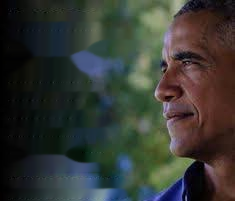

a close up of a person wearing a blue shirt


In [28]:
from IPython.display import display, Image

import json
def read_json_file(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
    return data

display(Image(filename=f"/mnt/data1/datasets/memes/harmp/images/img_clean/harmeme_images_us_pol/{meme_id}.png", width=400, height=400))
caption_data = read_json_file(f"/mnt/data1/datasets/memes/harmp/preprocessing/blip2_captions/harmeme_images_us_pol/{meme_id}.json")
print(caption_data['caption'])

## Image Feature Extraction

Image feature extraction procedures are defined under `preprocessing/image-extraction/image_extraction`.

MATK supports the use of image features in addition to the use of just images for fine-tuning and evaluation. Thus, MATK features wrappers for performing image feature extraction with state-of-the-art models like:

1. **CLIP**: `clip.py`
2. **Faster-RCNN**: `frcnn.py`

In this tutorial, we will use Faster-RCNN features as an example walkthrough.
hrough.
n.py`

In [31]:
!python3 ../preprocessing/image-extraction/image_extraction/frcnn.py \
  --frcnn_class_or_path unc-nlp/frcnn-vg-finetuned \
  --device cuda \
  --image-dir "/mnt/data1/datasets/memes/harmp/images/img_clean/harmeme_images_us_pol" \
  --feature-dir "/mnt/data1/datasets/memes/harmp/preprocessing/frcnn_features" \
  --overwrite True

loading configuration file cache
loading weights file https://cdn.huggingface.co/unc-nlp/frcnn-vg-finetuned/pytorch_model.bin from cache at /mnt/data2/.cache/huggingface/hub/57f6df6abe353be2773f2700159c65615babf39ab5b48114d2b49267672ae10f.77b59256a4cf8343ae0f923246a81489fc8d82f98d082edc2d2037c977c0d9d0
All model checkpoint weights were used when initializing GeneralizedRCNN.

All the weights of GeneralizedRCNN were initialized from the model checkpoint at unc-nlp/frcnn-vg-finetuned.
If your task is similar to the task the model of the checkpoint was trained on, you can already use GeneralizedRCNN for predictions without further training.
Extracting features:   0%|                             | 0/3552 [00:00<?, ?it/s]/home/mshee/anaconda3/envs/MATK-test/lib/python3.8/site-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered intern

#### Let's examine the structure of the generated features

In [33]:
import pickle

with open(f"/mnt/data1/datasets/memes/harmp/preprocessing/frcnn_features/unc-nlp/frcnn-vg-finetuned/{meme_id}.pkl", 'rb') as f:
    features = pickle.load(f)

In [34]:
print(features.keys())

odict_keys(['obj_ids', 'obj_probs', 'attr_ids', 'attr_probs', 'boxes', 'sizes', 'preds_per_image', 'roi_features', 'normalized_boxes'])


We're interested in the `roi_features` data as this contains the Faster-RCNN features.